<font color=red>\[notes ii\](1) a virtual env was not created</font>

In [1]:
# load the boston dataset
from sklearn import datasets

boston = datasets.load_boston()

In [2]:
# see the descr
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

\[notes i\](1) We can gain a lot of info from the DESCR attr of the dataset.

In [3]:
# get data and targets
boston_data = boston.data
boston_target = boston.target

In [4]:
# numpy.ndarray -> pandas dataframe obj
import numpy as np
import pandas as pd

boston_data = pd.DataFrame(boston_data, columns=boston.feature_names)
boston_target = pd.DataFrame(boston_target, columns=["MEDV"])
boston = pd.concat([boston_data, boston_target], axis=1)

<font color=red>\[notes ii\](1) use the **head()** method to take a look at the top five rows</font>

In [5]:
# [notes ii](1) take a quick look
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# see info
boston.info()  # contains the info of boston_data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [7]:
boston.describe()  # contains the info of boston_data.count()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<font color=red>\[notes ii\](1)plot a histogram for each numerical attr with the **hist()** method</font>  
<font color=red>\[notes ii\](2)B, NOX, RAD are capped? how to judge if an attr is capped?</font>  
<font color=blue>\[notes iii\](1)also plot the target. MEDV is also capped and the capped target should be removed since MEDV is the **target** [有16个目标值值为50.0的数据点需要被移除。](https://blog.csdn.net/mingxiaod/article/details/85938251)</font>

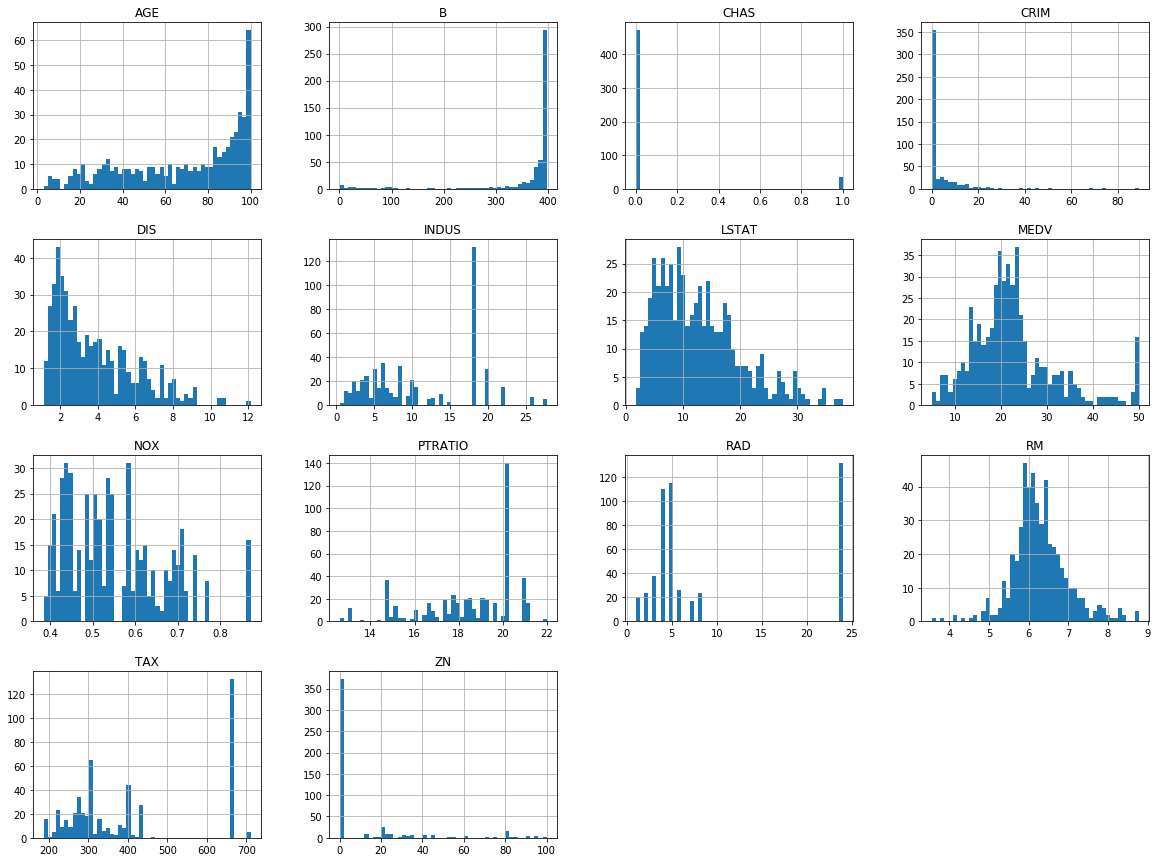

In [8]:
# [notes ii](1) histograms
%matplotlib inline
import matplotlib.pyplot as plt

# [notes iii](1) plot the target
boston_data_target = pd.concat([boston_data, boston_target], axis=1)

boston_data_target.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
# create a test set
from sklearn.model_selection import train_test_split

boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(
    boston_data, boston_target, test_size=0.2, random_state=42)

<font color=red>\[notes ii\](1)discovering and visualization should be made on a **copy** of the training set</font>  
<font color=red>\[notes ii\](2)explore **correlations**</font>  

In [10]:
# [notes i](1) make a copy
boston_train = pd.concat([boston_X_train, boston_y_train], axis=1)
boston_explore = boston_train.copy()
# [notes ii](2) calculate the corr
corr_matrix = boston_explore.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.198855,0.400198,-0.044589,0.396406,-0.200303,0.334090,-0.366487,0.615947,0.576894,0.288970,-0.356858,0.414142,-0.380091
ZN,-0.198855,1.000000,-0.533489,-0.043754,-0.526414,0.274661,-0.575078,0.681817,-0.313790,-0.294267,-0.389163,0.178652,-0.396572,0.309504
INDUS,0.400198,-0.533489,1.000000,0.095158,0.770957,-0.398690,0.636569,-0.707566,0.588952,0.702353,0.348303,-0.363151,0.603644,-0.470546
CHAS,-0.044589,-0.043754,0.095158,1.000000,0.135476,0.111272,0.096016,-0.121671,0.028685,0.007746,-0.113003,0.041666,-0.070652,0.190642
NOX,0.396406,-0.526414,0.770957,0.135476,1.000000,-0.299615,0.720417,-0.772330,0.589061,0.650247,0.161253,-0.368034,0.593862,-0.415768
RM,-0.200303,0.274661,-0.398690,0.111272,-0.299615,1.000000,-0.210863,0.198299,-0.199738,-0.281127,-0.342643,0.113347,-0.612577,0.710680
AGE,0.334090,-0.575078,0.636569,0.096016,0.720417,-0.210863,1.000000,-0.756589,0.430321,0.471670,0.240841,-0.265186,0.571051,-0.340216
DIS,-0.366487,0.681817,-0.707566,-0.121671,-0.772330,0.198299,-0.756589,1.000000,-0.483329,-0.523577,-0.217588,0.291122,-0.494921,0.235114
RAD,0.615947,-0.313790,0.588952,0.028685,0.589061,-0.199738,0.430321,-0.483329,1.000000,0.912527,0.472257,-0.439387,0.480301,-0.387467
TAX,0.576894,-0.294267,0.702353,0.007746,0.650247,-0.281127,0.471670,-0.523577,0.912527,1.000000,0.444836,-0.442027,0.530632,-0.459795


In [11]:
# look at how much each attr correlates with the price
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.710680
B          0.339918
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

<font color=red>\[notes ii\](1)the figures plotted below can be used to check for **corrs** btw attrs</font>  
<font color=red>\[notes ii\](2)plot the price against attrs with **high** corrs</font>

In [12]:
# [notes ii](2) create an attr list
attr_list = ["MEDV", "RM", "LSTAT"]

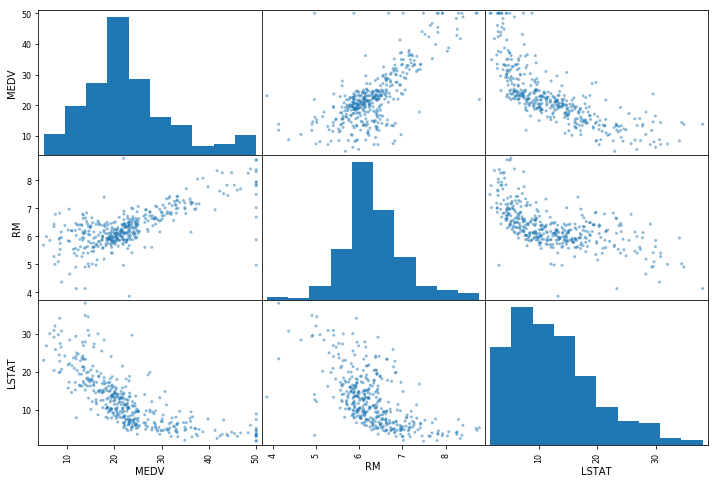

In [13]:
# plot some figures
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

scatter_matrix(boston_explore[attr_list], figsize=(12, 8))
plt.show()

<font color=red>\[notes ii\](1)**attr combinations** may be needed to create some more useful attrs</font>

<font color=blue>\[notes iii\](1)remove instances whose MEDV is capped [有16个目标值值为50.0的数据点需要被移除。](https://blog.csdn.net/mingxiaod/article/details/85938251)</font>  
<font color=blue>\[notes iii\](2)remove attrs that are not correlated to the target? [根据散点图分析，房屋的’RM’， ‘LSTAT’，'PTRATIO’特征与房价的相关性最大，所以，将其余不相关特征移除。](https://blog.csdn.net/mingxiaod/article/details/85938251)</font>

In [14]:
# [notes iii](1) remove capped instances
def remove_capped_instances(X, y):
    return X[~y["MEDV"].isin([50])]

boston_X_train = remove_capped_instances(boston_X_train, boston_y_train)
boston_y_train = remove_capped_instances(boston_y_train, boston_y_train)
boston_X_test = remove_capped_instances(boston_X_test, boston_y_test)
boston_y_test = remove_capped_instances(boston_y_test, boston_y_test)

In [15]:
# preprocess data
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
boston_X_train_prepared = std_scaler.fit_transform(boston_X_train) 

In [16]:
# train a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(boston_X_train_prepared, boston_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<font color=red>\[notes ii\](1)use the **transformed** data to predict</font>

In [17]:
# [notes ii](1) transform
some_data = boston_X_train.iloc[:5]
some_labels = boston_y_train.iloc[:5]

some_data_prepared = std_scaler.transform(some_data)

# predict
print(lin_reg.predict(some_data_prepared)[:, 0])
print(list(some_labels.MEDV))

[10.659838   19.57949568 23.60548113 12.42122191 18.58217239]
[12.0, 19.9, 19.4, 13.4, 18.2]


In [18]:
# use cv to measure the performance
from sklearn.model_selection import cross_val_score

mse = cross_val_score(lin_reg, boston_X_train_prepared, boston_y_train, cv=10, scoring="neg_mean_squared_error")
rmse = np.sqrt(-mse)
rmse.mean()

3.8955734526321364

In [19]:
# use the test set
boston_X_test_prepared = std_scaler.transform(boston_X_test)

mse_test = cross_val_score(lin_reg, boston_X_test_prepared, boston_y_test, cv=10, scoring="neg_mean_squared_error")
rmse_test = np.sqrt(-mse_test)
rmse_test.mean()

3.816080447593791